In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
import itertools
import shutil
import random
import glob
import matplotlib.pyplot as plt
import PIL
import pathlib
from keras.preprocessing import image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
data_dir = pathlib.Path('C:/Users/scogl/Downloads/archive/raw-img')

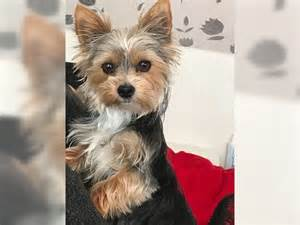

In [4]:
dog = list(data_dir.glob('dog/*'))
PIL.Image.open(str(dog[0]))

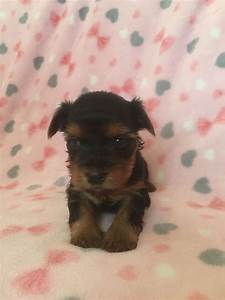

In [5]:
PIL.Image.open(str(dog[1]))

In [6]:
batch_size = 32
image_size = (224, 224, 3)
epoch_step = int(26179/batch_size)
model_name = "alexnet_animals"
print(epoch_step)

818


In [7]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [8]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [9]:
print(batch_size)

32


In [10]:
class_names = train_dataset.class_names
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


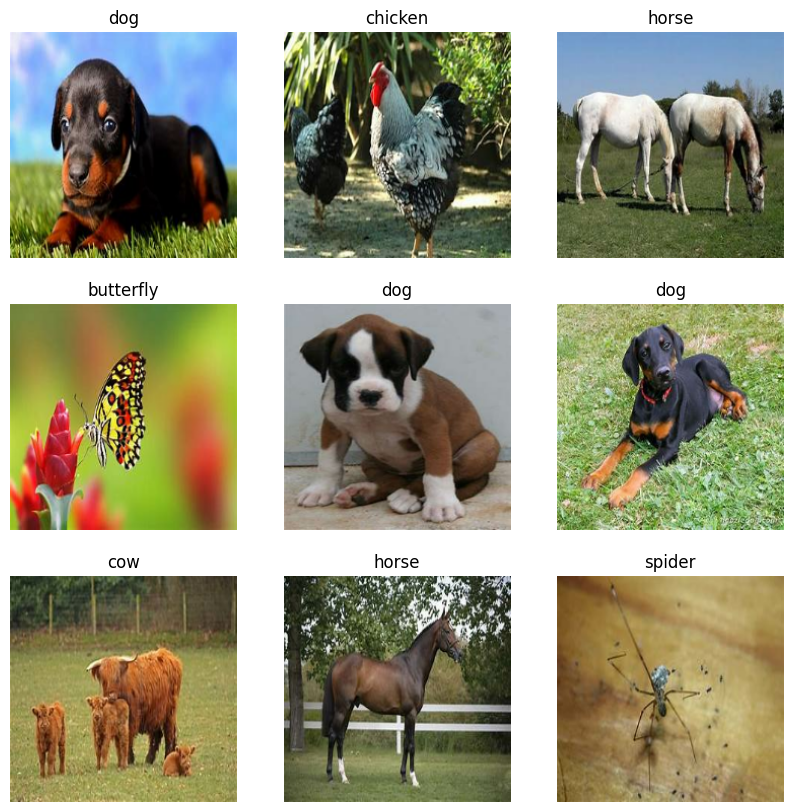

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [14]:
model = Sequential()
model.add(data_augmentation)
model.add(keras.layers.Rescaling(1./255, input_shape = (224, 224, 3)))
model.add(keras.layers.Conv2D(filters = 96, kernel_size = (11, 11), input_shape = (224, 224, 3), padding = "valid", strides = (4, 4), activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5), padding='valid', strides=(1,1), activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='valid', strides=(1,1), activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='valid', strides=(1,1), activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='valid', strides=(1,1), activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, input_shape = (224*224*3,), activation = "relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(4096, activation = "relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)      

In [16]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size = 32,
    epochs=20
)

Epoch 1/20
655/655 [==============================] - ETA: 0s - loss: 2.6443 - accuracy: 0.2338

KeyboardInterrupt: 

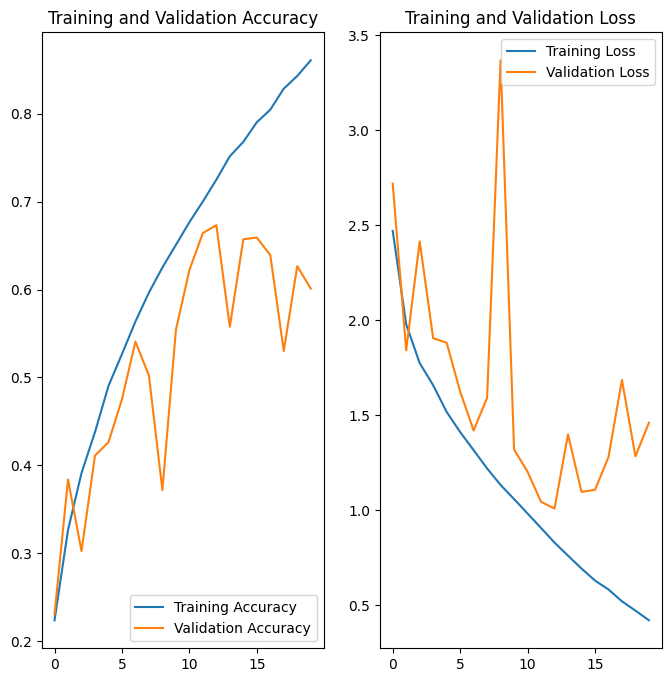

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()